In [1]:
# Step 1: Import required library
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("ifood_df.csv")

# Step 3: Display first 5 rows
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [2]:
# Step 4: Basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [3]:
# Step 5: Check for missing values
df.isnull().sum()


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [4]:
# Step 6: Drop unneeded or redundant columns
df_model = df.drop(columns=[
    'Z_CostContact', 'Z_Revenue', 'Complain',
    'AcceptedCmpOverall', 'MntRegularProds',  # redundant with MntTotal
])

# Optional: Drop highly correlated or rarely used columns if needed later

# Step 7: Display the shape of the new DataFrame
df_model.shape


(2205, 34)

In [5]:
from sklearn.preprocessing import StandardScaler

# Step 8: Initialize the scaler
scaler = StandardScaler()

# Step 9: Apply scaling
scaled_data = scaler.fit_transform(df_model)

# Optional: Convert back to DataFrame for inspection
scaled_df = pd.DataFrame(scaled_data, columns=df_model.columns)

# Preview scaled data
scaled_df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal
0,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,...,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,1.678056
1,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,...,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,-0.940880
2,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,...,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,0.297384
3,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,...,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694,-0.893989
4,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,...,1.257763,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873,-0.270516


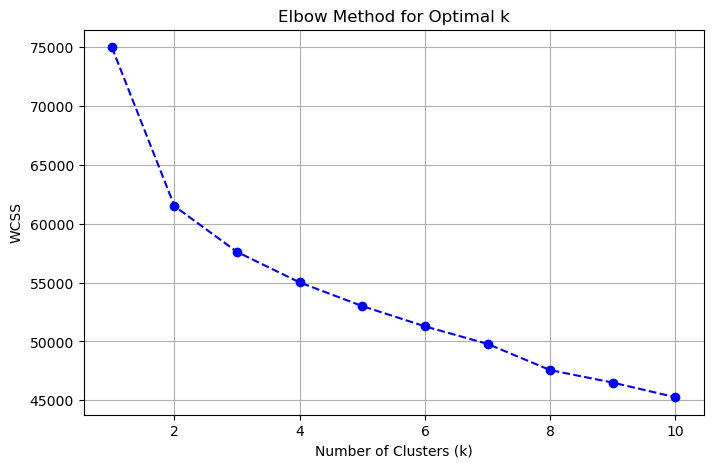

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 10: Try k from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Step 11: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [7]:
# Step 12: Apply K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Step 13: Add cluster labels to original DataFrame
df['Cluster'] = cluster_labels

# Check how many customers in each cluster
df['Cluster'].value_counts()


Cluster
0    1322
1     883
Name: count, dtype: int64

In [8]:
# Step 14: Analyze average behavior of each cluster
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
cluster_profile.T  # Transpose for easier viewing


Cluster,0,1
Income,38476.407716,71303.406569
Kidhome,0.693646,0.065685
Teenhome,0.555219,0.433749
Recency,48.662632,49.527746
MntWines,99.145234,616.107588
MntFruits,6.811649,55.734994
MntMeatProducts,37.334342,356.916195
MntFishProducts,9.975038,79.349943
MntSweetProducts,6.951589,57.336353
MntGoldProds,22.791982,75.894677


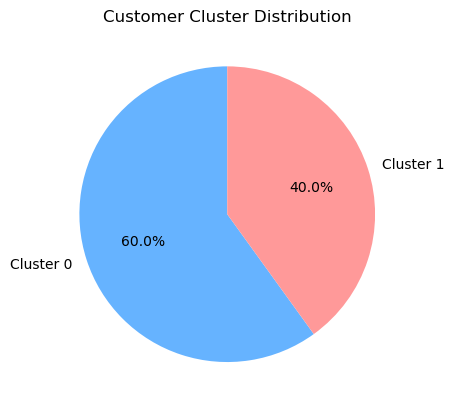

In [9]:
import matplotlib.pyplot as plt

# Pie chart of cluster sizes
df['Cluster'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    labels=['Cluster 0', 'Cluster 1']
)
plt.title("Customer Cluster Distribution")
plt.ylabel("")
plt.show()


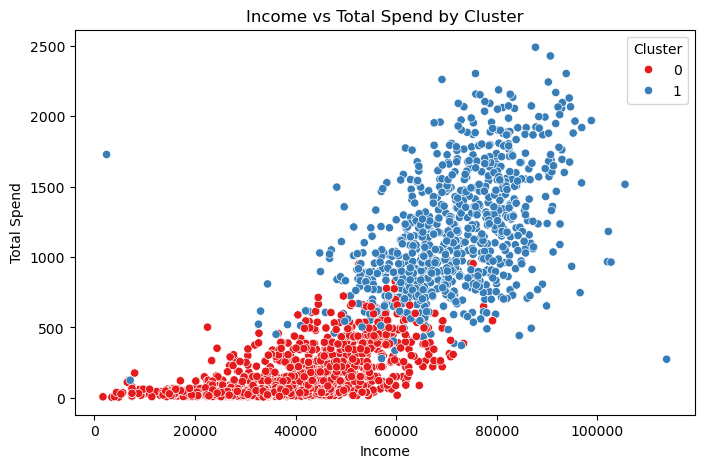

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Income', y='MntTotal', hue='Cluster', palette='Set1')
plt.title("Income vs Total Spend by Cluster")
plt.xlabel("Income")
plt.ylabel("Total Spend")
plt.show()


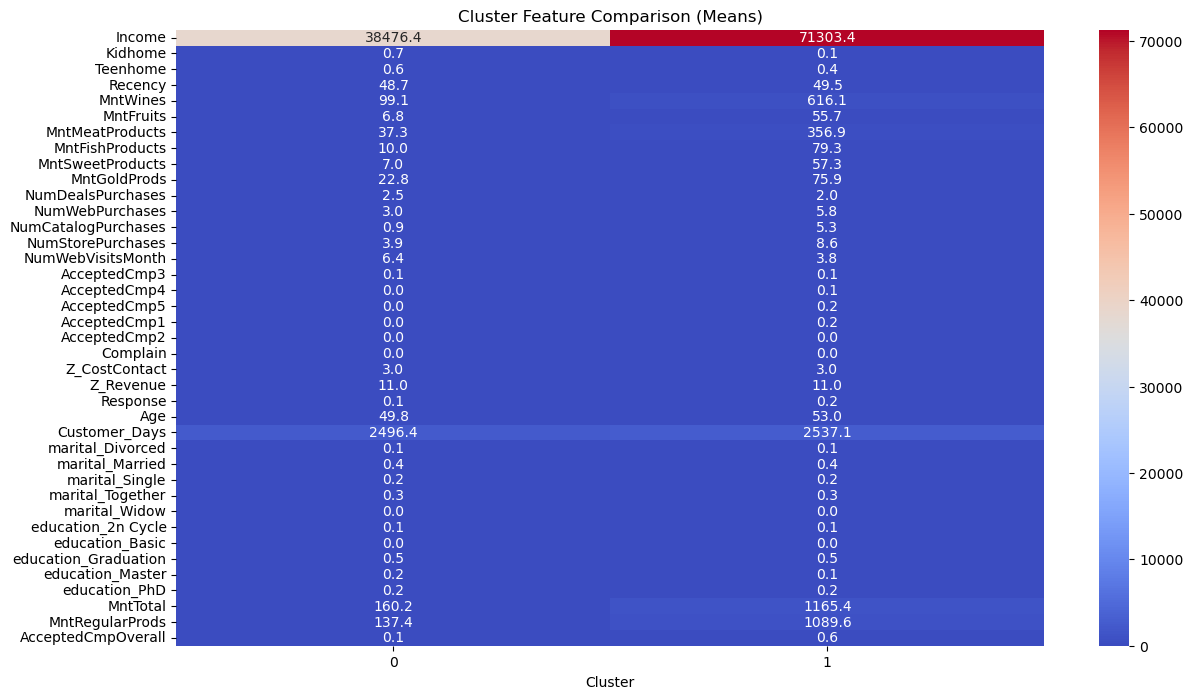

In [11]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_profile.T, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Cluster Feature Comparison (Means)")
plt.show()


In [12]:
# Save the DataFrame with cluster labels
df.to_csv("Clustered_Customers.csv", index=False)


Final Insights

- Two customer segments were identified:
  - **Cluster 0:** Low-income, low-spending, low engagement
  - **Cluster 1:** High-income, high-spending, strong campaign response

- Business Recommendation:
  - Focus premium marketing, loyalty programs on Cluster 1
  - Use discounts/free trials to engage Cluster 0
